In [1]:
import os
import splusdata

In [2]:
os.system('./galfitm-1.4.4-osx galfit.feedme.template')

26880

In [3]:
conn = splusdata.connect()

You have access to internal data


In [4]:
for band in ['R', 'I', 'G']:
    conn.get_cut(69.38, -42.06, 200, band, filepath=f'{band}.fits')

In [1]:
def make_psf(fwhm, beta, radius, outfile):
    import numpy as np
    from astropy.io import fits as pf
    fwhm = fwhm/0.5
    #beta = beta/0.5 
    alpha = fwhm / (2 * np.sqrt(np.power(2., 1/beta) - 1.))
    r = np.linspace(-radius, radius, 2 * radius + 1)
    print(r)
    X, Y = np.meshgrid(r, r)
    R = np.sqrt(X**2 + Y**2)
    I = (beta - 1.) / (np.pi * alpha**2) * \
        np.power(1. + np.power(R / alpha, 2), -beta)
    hdu = fits.PrimaryHDU(I)
    hdulist = pf.HDUList([hdu])
    hdulist.writeto(outfile, clobber=True)
    return

In [2]:
from astropy.io import fits

In [11]:
unpack = fits.open('G.fits')
pack = fits.open('G.fits.fz')

In [4]:
import astropy

In [49]:
import astropy
from astropy.io import fits


def unpack_file(filename, output=None, delete_compressed = False):
    import os
    """
    Funpack (uncompress) .fz file
    """
    if not output:
        output = filename.replace('.fz', '')
        
    if delete_compressed:
        os.remove(filename)
    
    packed = fits.open(filename)
    unpacked = astropy.io.fits.hdu.image.PrimaryHDU(data = packed[1].data, header = packed[1].header)
    astropy.io.fits.hdu.hdulist.HDUList(hdus=[unpacked]).writeto(output, overwrite=True)

In [50]:
unpack_file('G.fits.fz')

In [73]:
import numpy as np
from astropy.io import fits as pf

def make_psf(fwhm, beta, outfile, radius = 10):
    
    fwhm = fwhm/0.5
    #beta = beta/0.5 
    alpha = fwhm / (2 * np.sqrt(np.power(2., 1/beta) - 1.))
    r = np.linspace(-radius, radius, 2 * radius + 1)
    X, Y = np.meshgrid(r, r)
    R = np.sqrt(X**2 + Y**2)
    I = (beta - 1.) / (np.pi * alpha**2) * \
        np.power(1. + np.power(R / alpha, 2), -beta)
    
    #hdu = fits.PrimaryHDU(I)
    #hdulist = pf.HDUList([hdu])
    #hdulist.writeto(outfile, clobber=True)
    return I

In [79]:
def get_psf_data(filename):
    """Returns x0,y0 from image header"""
    hdulist = fits.open(filename)
    hdu = hdulist[0]
    
    ret = (None, None)
    for i in hdu.header:
        if 'FWHMMEAN' in i:
            ret[0] = hdu.header[i]
        
    
    ret = (hdu.header["HIERARCH OAJ PRO FWHMMEAN"],hdu.header["HIERARCH OAJ PRO FWHMBETA"])
    hdulist.close()
    return ret

In [80]:
get_psf_data('G.fits')

OAJ PRO FWHMMEAN


(1.621482455730438, 1.834800004959106)

In [76]:
I = make_psf(1.621482, 1.834800, outfile=None)

In [77]:
import matplotlib.pyplot as plt

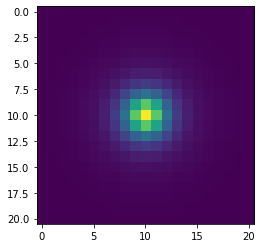

In [78]:
plt.imshow(I)